In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
inadi = pd.read_csv('base_dados_credito.csv')
inadi.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [4]:
inadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [5]:
inadi.isnull().sum()

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [6]:
inadi.nunique()

id                         10127
default                        2
idade                         45
sexo                           2
dependentes                    6
escolaridade                   5
estado_civil                   3
salario_anual                  5
tipo_cartao                    4
meses_de_relacionamento       44
qtd_produtos                   6
iteracoes_12m                  7
meses_inativo_12m              7
limite_credito              9272
valor_transacoes_12m       10035
qtd_transacoes_12m           126
dtype: int64

In [7]:
inadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [8]:
inadi = inadi.rename({'default': 'target'}, axis = 1)
inadi.head()

,id,target,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [9]:
inadi['limite_credito'] = inadi['limite_credito'].str.replace(r'[,.]', '', regex = True)
inadi['valor_transacoes_12m'] = inadi['valor_transacoes_12m'].str.replace(r'[,.]', '', regex = True)
inadi['limite_credito'] = inadi['limite_credito'].astype('int64')
inadi['valor_transacoes_12m'] = inadi['valor_transacoes_12m'].astype('int64')

inadi.head()

,id,target,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,1269151,114490,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,825696,129145,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,341856,188772,20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,331303,117156,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,471622,81608,28


In [10]:
inadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   target                   10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  int64 
 14  valor_transacoes_12m     10127 non-nul

### Testes das Hipóteses

1. Relação entre idade e limite de crédito.
   * Hipótese: Clientes mais velhos tendem a ter limites de créditos mais altos
   * Justificativa: Pessoas mais velhas podem ter um histórico de crédito mais longo e estável, resultando em limites de crédito mais altos

2. Impacto da escolaridade no valor das transações.
   * Hipótese: Clientes com maior escolaridade tendem a realiazar transações de maior valor.
   * Justificativa: Um nível de escolaridade mais alto pode estar associado a rendar maiores resultando em transações de maior valor.

3. Influência do salário anual no limite de crédito:
   * Hipótese: Clientes com maior faixa salarial tendem a ter limites de crédito mais altos.
   * Justificativa: Bancos geralmente oferecem limites de crédito maiores para clientes com maiores rendas, devido ao menor risco percebido.

4. Homens fazem mais transações
   * Hipótese: Homens tendem a fazer mais transações financeiras
   * Justificativa: Homens fazem mais transações financeiras porque na maioria das vezes são o que estão na frente das despesas financeiras

In [11]:
# Idade presentes no nosso dataframe
inadi['idade'].sort_values(ascending= True).unique()

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 73], dtype=int64)

In [12]:
inadi.head()

,id,target,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,1269151,114490,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,825696,129145,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,341856,188772,20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,331303,117156,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,471622,81608,28


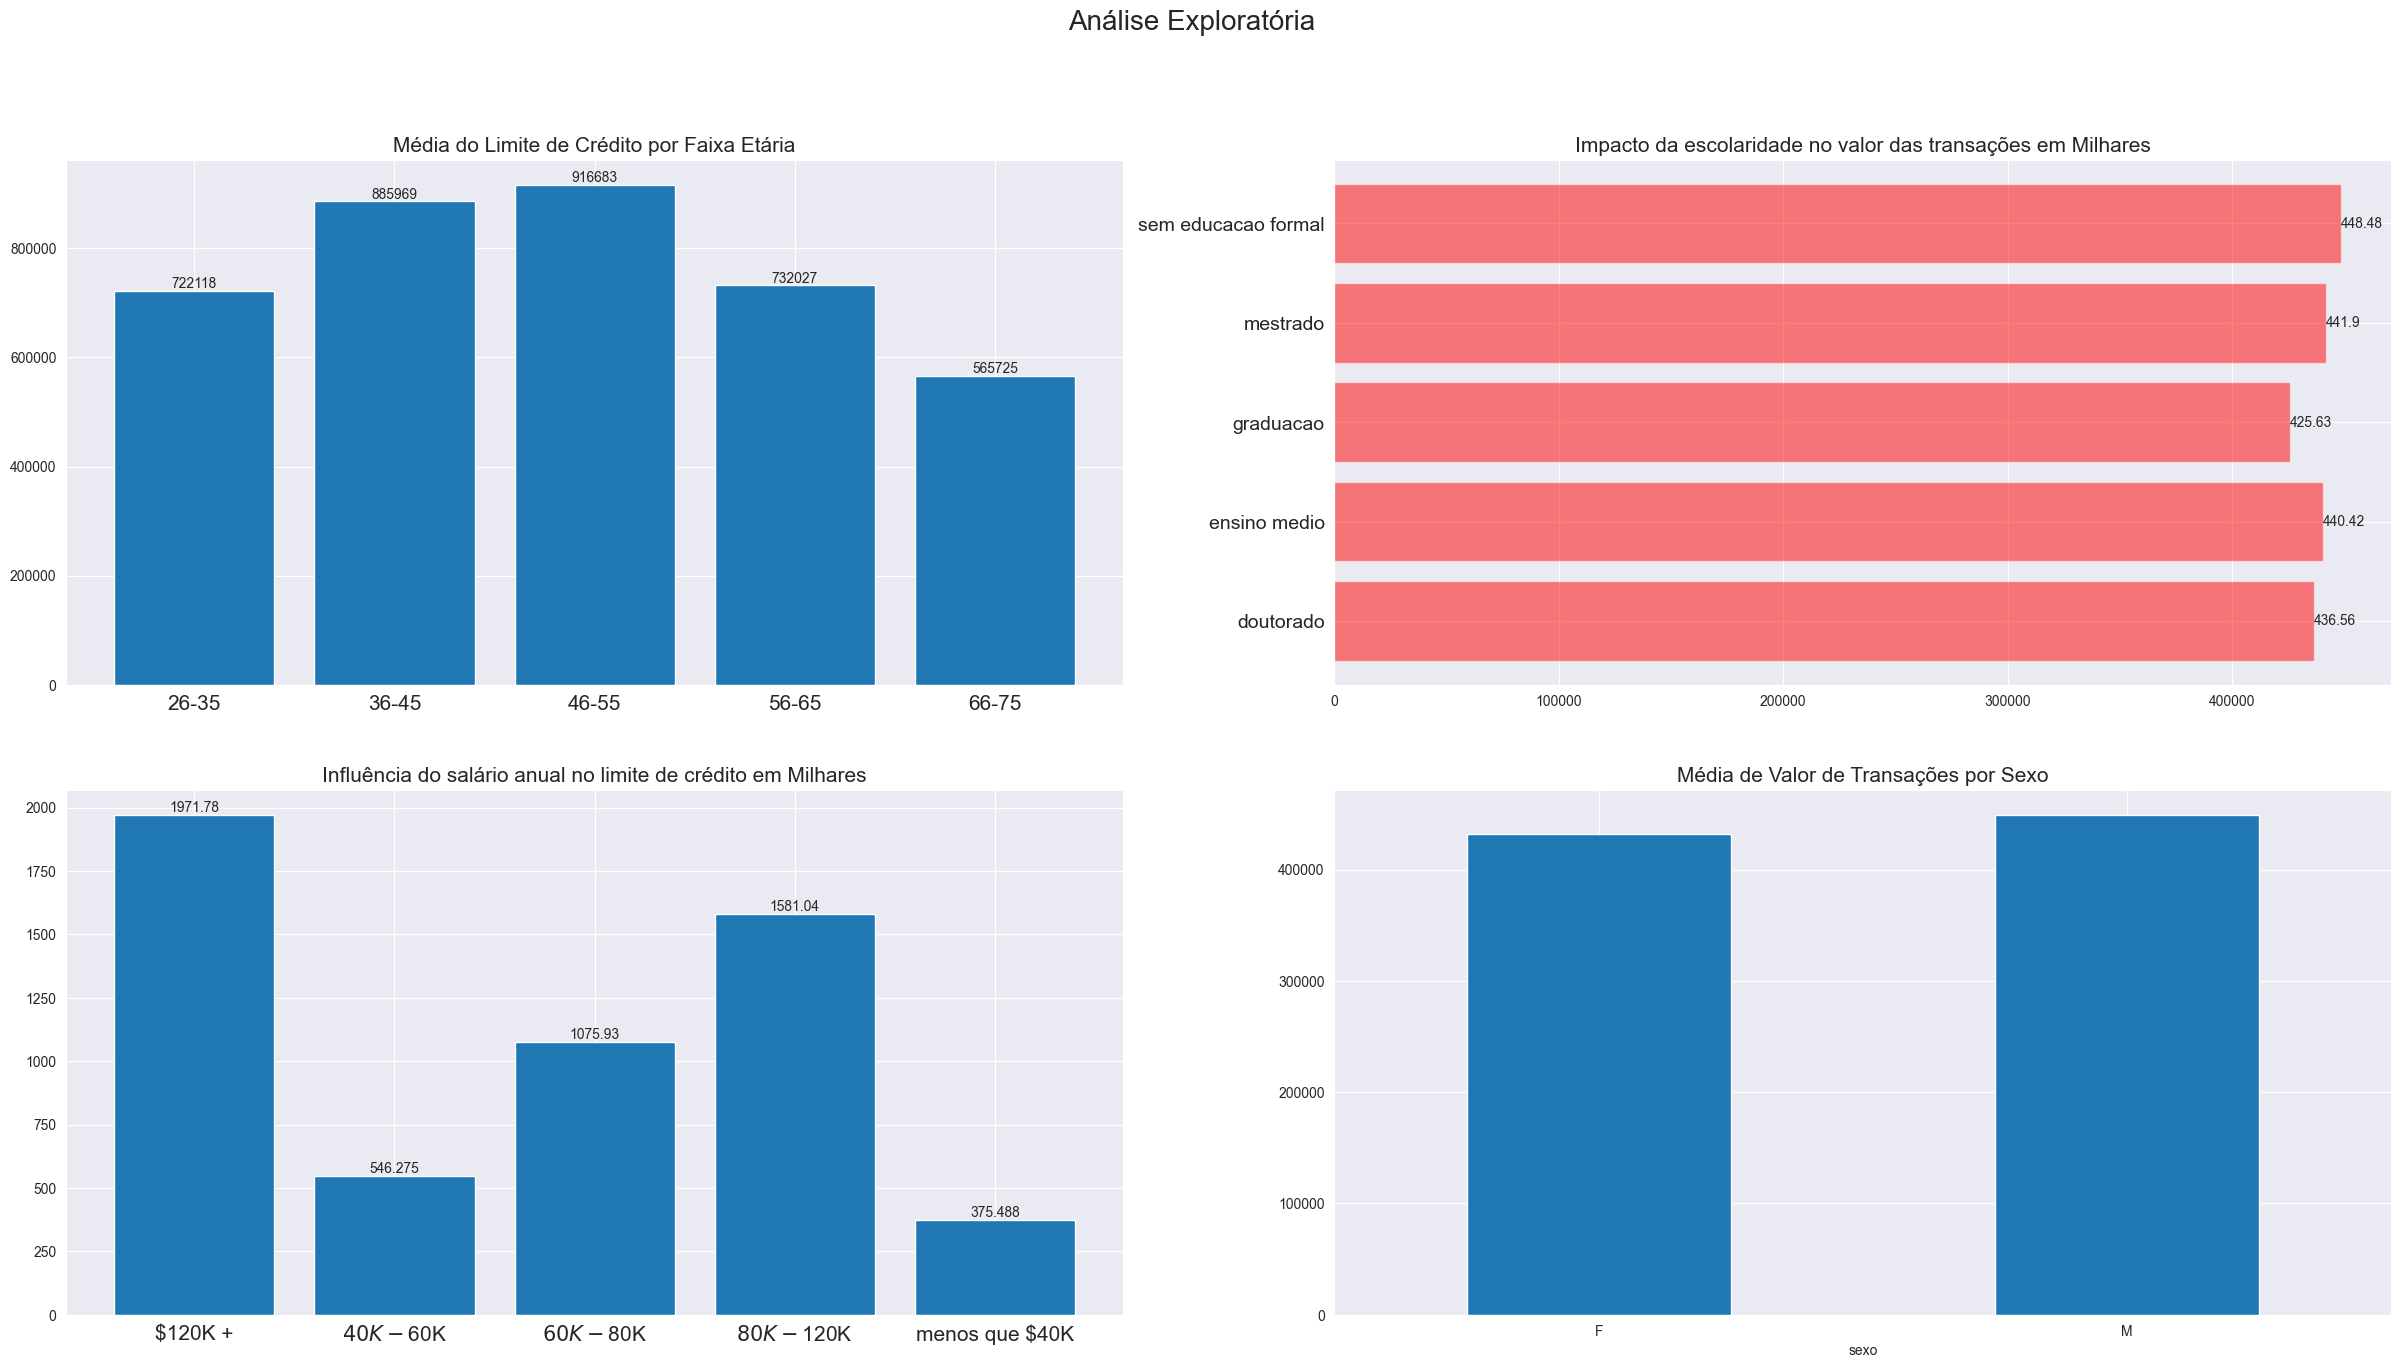

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 15))

fig.suptitle('Análise Exploratória', fontsize = 20)
# 1. Relação entre idade e limite de crédito.

bins = [25, 35, 45, 55, 65, 75]
labels = ['26-35', '36-45', '46-55', '56-65', '66-75']
inadi['faixa_etaria'] = pd.cut(inadi['idade'], bins= bins, labels = labels, right= True)

limite_credito_faixa = inadi.groupby('faixa_etaria', observed=False)['limite_credito'].mean().reset_index(name = 'contagem')
barras = ax1.bar(limite_credito_faixa['faixa_etaria'], limite_credito_faixa['contagem'])
ax1.bar_label(barras)
ax1.set_title('Média do Limite de Crédito por Faixa Etária',fontsize = 15)
ax1.set_xticks(range(len(limite_credito_faixa['faixa_etaria'])))
ax1.set_xticklabels(limite_credito_faixa['faixa_etaria'], fontsize=15)

# 2. Impacto da escolaridade no valor das transações.

escolaridade_transacoes = inadi.groupby('escolaridade', observed=False)['valor_transacoes_12m'].mean().reset_index(name = 'contagem')
barras_la = ax2.barh(escolaridade_transacoes['escolaridade'], escolaridade_transacoes['contagem'], color = 'red', alpha = 0.5)

#Transformando os valores para milhares
escolaridade_transacoes['contagem'] = escolaridade_transacoes['contagem']/1000

ax2.bar_label(barras_la, labels = round(escolaridade_transacoes['contagem'], 2))
ax2.set_title('Impacto da escolaridade no valor das transações em Milhares', fontsize = 15)
ax2.set_yticks(range(len(escolaridade_transacoes['escolaridade'])))
ax2.set_yticklabels(escolaridade_transacoes['escolaridade'], fontsize=14)


# 3. Influência do salário anual no limite de crédito:
Sanual_limite_credito = inadi.groupby('salario_anual', observed=False)['limite_credito'].mean().reset_index(name = 'contagem')
Sanual_limite_credito['contagem'] = Sanual_limite_credito['contagem']/1000

barras = ax3.bar(Sanual_limite_credito['salario_anual'], Sanual_limite_credito['contagem'])
ax3.bar_label(barras)

ax3.set_title('Influência do salário anual no limite de crédito em Milhares', fontsize = 15)
ax3.set_xticks(range(len(Sanual_limite_credito['salario_anual'])))
ax3.set_xticklabels(Sanual_limite_credito['salario_anual'], fontsize=15)


# 4. Homens fazem mais transações

sexo_transacoes = inadi[['sexo', 'valor_transacoes_12m']]

# Calcular média de transações por sexo
media_transacoes = sexo_transacoes.groupby('sexo')['valor_transacoes_12m'].mean()

# Visualização
media_transacoes.plot(kind='bar', rot=0)
ax4.set_title('Média de Valor de Transações por Sexo', fontsize=15)


plt.grid(True)

### 1. Relação entre idade e limite de crédito
Hipótese: Clientes mais velhos tendem a ter limites de crédito mais altos.
Justificativa: Pessoas mais velhas podem ter um histórico de crédito mais longo e estável, resultando em limites de crédito mais altos.

Resultado Gráfico:
A média do limite de crédito por faixa etária indica que os clientes entre 46-55 anos têm o maior limite de crédito, enquanto os clientes de 66-75 anos têm o menor limite de crédito.

A hipótese é parcialmente confirmada. Observamos que os clientes na faixa de 46-55 anos possuem os maiores limites de crédito, o que pode ser atribuído ao pico de estabilidade financeira e histórico de crédito mais extenso. No entanto, o limite de crédito começa a diminuir para os clientes mais velhos (66-75 anos), possivelmente devido a uma redução na renda ou mudança no comportamento de consumo. A relação não é linear, sugerindo que outros fatores também influenciam o limite de crédito além da idade.

### 2. Impacto da escolaridade no valor das transações
Hipótese: Clientes com maior escolaridade tendem a realizar transações de maior valor.
Justificativa: Um nível de escolaridade mais alto pode estar associado a rendas maiores, resultando em transações de maior valor.

Resultado Gráfico:
Os valores das transações não variam significativamente com o nível de escolaridade, com pequenas diferenças entre os grupos.

A hipótese não é confirmada. Os dados mostram que não há uma diferença substancial no valor das transações entre diferentes níveis de escolaridade. Isso sugere que a escolaridade por si só não é um fator determinante para o valor das transações. É possível que outros fatores, como a renda ou o comportamento individual, tenham um impacto maior no valor das transações.

### 3. Influência do salário anual no limite de crédito
Hipótese: Clientes com maior faixa salarial tendem a ter limites de crédito mais altos.
Justificativa: Bancos geralmente oferecem limites de crédito maiores para clientes com maiores rendas, devido ao menor risco percebido.

Resultado Gráfico:
Há uma clara tendência de que clientes com salários mais altos possuem limites de crédito mais altos. Por exemplo, clientes com rendas acima de $120K têm os maiores limites de crédito.

A hipótese é confirmada. Observa-se uma correlação positiva entre a faixa salarial e o limite de crédito. Clientes com salários mais altos (acima de $120K) possuem limites de crédito significativamente maiores, o que é consistente com a prática dos bancos de oferecer maiores limites a clientes de alta renda devido ao menor risco de inadimplência. Isso reflete a confiança das instituições financeiras na capacidade de pagamento desses clientes.

### 4. Homens fazem mais transações
Hipótese: Homens tendem a fazer mais transações financeiras.
Justificativa: Homens fazem mais transações financeiras porque na maioria das vezes estão na frente das despesas financeiras.

Resultado Gráfico:
A média do valor das transações por sexo mostra que não há uma diferença significativa entre homens e mulheres.

A hipótese não é confirmada. Os dados indicam que não há uma diferença significativa na média do valor das transações entre homens e mulheres. Isso sugere que ambos os sexos participam de forma equivalente nas transações financeiras. Este resultado pode refletir mudanças nas responsabilidades financeiras, com uma maior igualdade na gestão das finanças domésticas entre homens e mulheres.




### Separando os dados categóricos dos numéricos

In [14]:
# Quantidade de valores únicos por atributo
inadi.nunique()

id                         10127
target                         2
idade                         45
sexo                           2
dependentes                    6
escolaridade                   5
estado_civil                   3
salario_anual                  5
tipo_cartao                    4
meses_de_relacionamento       44
qtd_produtos                   6
iteracoes_12m                  7
meses_inativo_12m              7
limite_credito              9272
valor_transacoes_12m       10035
qtd_transacoes_12m           126
faixa_etaria                   5
dtype: int64

In [15]:
# Olhando o tipo dos nossos dados
inadi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       10127 non-null  int64   
 1   target                   10127 non-null  int64   
 2   idade                    10127 non-null  int64   
 3   sexo                     10127 non-null  object  
 4   dependentes              10127 non-null  int64   
 5   escolaridade             8608 non-null   object  
 6   estado_civil             9378 non-null   object  
 7   salario_anual            9015 non-null   object  
 8   tipo_cartao              10127 non-null  object  
 9   meses_de_relacionamento  10127 non-null  int64   
 10  qtd_produtos             10127 non-null  int64   
 11  iteracoes_12m            10127 non-null  int64   
 12  meses_inativo_12m        10127 non-null  int64   
 13  limite_credito           10127 non-null  int64   
 14  valor_

In [16]:
categorical_vars = [col for col in inadi.columns if inadi[col].dtype == 'object']
numerical_vars = [col for col in inadi.columns if inadi[col].dtype == 'int64' and col != 'target' and col !='id']
numerical_vars

['idade',
 'dependentes',
 'meses_de_relacionamento',
 'qtd_produtos',
 'iteracoes_12m',
 'meses_inativo_12m',
 'limite_credito',
 'valor_transacoes_12m',
 'qtd_transacoes_12m']

In [17]:
categorical_vars

['sexo', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao']

In [18]:
X = inadi[categorical_vars + numerical_vars]
y = inadi['target']

### Treinando o modelo

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 14), (2026, 14), (8101,), (2026,))

### Modelo Machine Learning e pré-processamento 

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

In [23]:
# Criar transformadores para colunas numéricas e categóricas

#Transformador numérico

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Transformador categórico

categoric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))
])


preprocessor = ColumnTransformer(
    transformers= [
        ('num', numeric_transformer, numerical_vars),
        ('cat', categoric_transformer, categorical_vars)
    ]
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators = 300, max_depth =3, learning_rate = 0.1, subsample = 0.9))   #Usando o xgbClassifier como estimador
])


In [24]:

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, verbose=2)

# Treinar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar melhores parâmetros e pontuação
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
print("Acurácia do melhor modelo:")
print(grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   0.2s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.7; total time=   0.4s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estima

In [25]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'dependentes',
                                                   'meses_de_relacionamento',
                                                   'qtd_produtos',
                                                   'iteracoes_12m',
                                                   'meses_inativo_12m',
                                                   'limite_credito',
                                                   'valor_transacoes_12m',
                                                   'qtd_transacoes_12m']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleIm...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [26]:
y_pred = pipeline.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 94.42%


### Utilizando a matriz de confusão

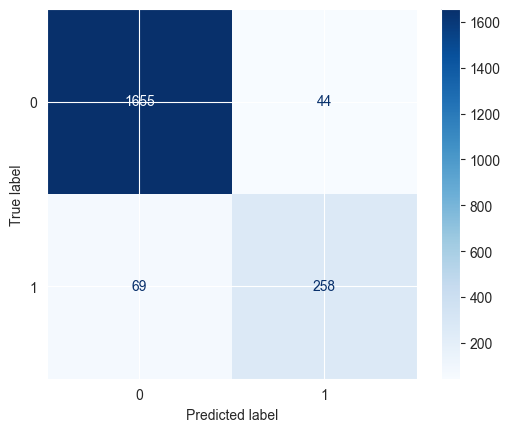

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = plt.cm.Blues)
plt.show()


1657 exemplos da classe verdadeira 0 foram corretamente classificados como 0.

42 exemplos da classe verdadeira 0 foram incorretamente classificados como 1.

72 exemplos da classe verdadeira 1 foram incorretamente classificados como 0.

255 exemplos da classe verdadeira 1 foram corretamente classificados como 1.

### Precisão, revocação e F1-score


Precision é a proporção de previsões corretas positivas em relação ao total de previsões positivas (VP/VP + FP). É uma medida de qualidade das previsões positivas

Recall é a proporção de previsões corretas positivas entre as observações positivas reais (VP/ (VP + FN)).

É uma medida de capacidade do modelo de encontrar todos os casos positivos
ou seja, estamos olhando dentre as observações que são positivas, quantas nosso modelo capturou

In [36]:
from sklearn.metrics import precision_score, recall_score

print("Nosso modelo tem um precisão de: ", round(precision_score(y_test, y_pred),4)*100, "%")
print("Nosso modelo tem um recall de:", round(recall_score(y_test, y_pred), 4)*100, "%")


Nosso modelo tem um precisão de:  85.42999999999999 %
Nosso modelo tem um recall de: 78.9 %


Geralmente, é pertinente combinar a precisão e a revocação em uma única métrica que se chama F1 score, ainda mais se você precisar de uma maneira simples

de comparar dois classificadores. A F1 - score, é a média harmônica da precisão e revocação. Ao passo que a média regular trata igualmente todos os valores,

a média harmônica dá mais importância aos valores mais baixos. Como resultado, o classificador só obterá um score F1 alto se a revocação e a precisão forem altas.

In [30]:
from sklearn.metrics import f1_score

print("F1 score do modelo:", round(f1_score(y_test, y_pred), 4)*100, "%")

F1 score do modelo: 82.03 %
